<a href="https://colab.research.google.com/github/Sankalp-2820/Boston_Pricing/blob/main/CE6670_Project_Miscellaneous_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Miscellaneous - 2. This part contains the trials of fitting different distributions to streamflows using l moments approach**

# CE6670 Course Project

In [1]:
import numpy as np
import pandas as pd

# Mounting Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data from CSV File

In [127]:
path = '/content/drive/MyDrive/Camels Aus Data/Streamflow Time series/03_streamflow/streamflow_MLd.csv'
df = pd.read_csv(path)
df.head()

,year,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
0,1951,1,1,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,92.6120,-99.99,-99.99,-99.99,213.759
1,1951,1,2,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,87.6400,-99.99,-99.99,-99.99,144.897
2,1951,1,3,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,79.5119,-99.99,-99.99,-99.99,128.456
3,1951,1,4,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,82.7683,-99.99,-99.99,-99.99,117.354
4,1951,1,5,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,89.2553,-99.99,-99.99,-99.99,115.843


In [128]:
df.shape

(23376, 225)

# Extraction of Annual Maximum values of Streamflows for all the stations

In [129]:
AMS = df.groupby(['year']).max()

In [130]:
AMS.head()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1951,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,1739.73,-99.99,-99.99,-99.99,5680.29
1952,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,4638.20,-99.99,-99.99,-99.99,8961.76
1953,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,43627.30,-99.99,2828.89,-99.99,-99.99,-99.99,3275.36
1954,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,52593.50,-99.99,2266.80,-99.99,-99.99,-99.99,6505.59
1955,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,36368.90,-99.99,3336.16,-99.99,-99.99,-99.99,4294.40


In [131]:
AMS.shape

(64, 224)

# Extracting the Stations Ids from the column names

In [132]:
column_names_array = AMS.columns[2:].tolist()
n_stations = len(column_names_array)

# Replacing the Missing values with NaN

In [133]:
AMS.replace(-99.99, np.nan, inplace=True)
AMS.head()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1951,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1739.73,NaN,NaN,NaN,5680.29
1952,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4638.20,NaN,NaN,NaN,8961.76
1953,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43627.3,NaN,2828.89,NaN,NaN,NaN,3275.36
1954,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52593.5,NaN,2266.80,NaN,NaN,NaN,6505.59
1955,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,36368.9,NaN,3336.16,NaN,NaN,NaN,4294.40


# Calculating the Percentage of NaN values for different Time Periods

In [134]:
import pandas as pd

percent = [10,20,30,40,50]
percent_of_stations = []
percent_nans_for_timeP = []
years = [4,14,24,34,44]

for y in years:
  nan_percent = AMS.iloc[y:,2:].isnull().mean() * 100
  for p in percent:
    stations_with_over_p_percent_nan = nan_percent[nan_percent > p]
    percent_of_stations.append(len(stations_with_over_p_percent_nan)/222*100)
  percent_nans_for_timeP.append(percent_of_stations)
  percent_of_stations = []


df = pd.DataFrame(percent_nans_for_timeP, columns=percent, index=years)
new_row_names = [60,50,40,30,20]
df.index = new_row_names
df = df.round(1)
print("The percentage NaN values for different time periods are as follows:")
df

The percentage NaN values for different time periods are as follows:


,10,20,30,40,50
60,75.2,55.0,18.9,2.7,0.0
50,35.6,9.0,2.3,0.0,0.0
40,4.5,1.4,0.5,0.0,0.0
30,5.0,2.3,0.9,0.5,0.0
20,5.4,2.7,2.3,0.9,0.5


### Observation: **For a 40 year period of 1975-2014, there are 4.5% stations which have more than 10% missing values. So we choose that period for our analysis**

# Slicing the AMS dataframe for the data of 40 years and Filling the missing values

In [135]:
AMS_without_null = AMS.iloc[24:,2:]

### NOTE: **Using KNNImputer from sklearn to fill the missing values for all the stations**

In [136]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=20)
AMS_without_null= impute_knn.fit_transform(AMS_without_null)
AMS_without_null = pd.DataFrame(AMS_without_null)

In [137]:
AMS_without_null.head()

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,171886.0,155415.0,7152.28,4593.730,41029.4,15118.7,61467.6,12158.90,68813.3,8308.47,...,9133.10,945.837,46784.5,60695.3,11997.6950,3905.36,17631.30,7641.13,27528.40,5963.62
1,129123.0,103335.0,5458.88,7039.570,100524.0,28825.5,48150.7,16103.40,69402.3,9636.01,...,1960.57,471.294,34607.9,49011.4,12489.0080,2391.66,8264.41,6281.46,12217.50,2382.45
2,147734.0,181327.0,2956.08,1644.130,240838.0,17783.6,157666.0,5208.97,59452.4,3176.85,...,2093.82,428.928,24366.5,29105.0,12661.2190,1314.88,9453.75,5398.26,9590.17,3631.31
3,25466.6,32386.1,483.45,894.971,42760.2,13798.0,30212.5,6511.00,24546.0,5668.98,...,1383.43,344.774,38106.5,24839.0,11763.5270,1177.38,9292.47,6505.36,7827.53,3956.38
4,82042.5,88730.2,5490.52,13232.100,643762.0,49980.1,129877.0,37568.30,84142.8,18203.50,...,1815.78,128.848,34444.5,32994.7,12692.0215,1553.18,15041.90,8523.38,9892.23,3149.38


In [138]:
AMS_without_null.columns = column_names_array
AMS_without_null.head()

,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,925001A,926002A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
0,171886.0,155415.0,7152.28,4593.730,41029.4,15118.7,61467.6,12158.90,68813.3,8308.47,...,9133.10,945.837,46784.5,60695.3,11997.6950,3905.36,17631.30,7641.13,27528.40,5963.62
1,129123.0,103335.0,5458.88,7039.570,100524.0,28825.5,48150.7,16103.40,69402.3,9636.01,...,1960.57,471.294,34607.9,49011.4,12489.0080,2391.66,8264.41,6281.46,12217.50,2382.45
2,147734.0,181327.0,2956.08,1644.130,240838.0,17783.6,157666.0,5208.97,59452.4,3176.85,...,2093.82,428.928,24366.5,29105.0,12661.2190,1314.88,9453.75,5398.26,9590.17,3631.31
3,25466.6,32386.1,483.45,894.971,42760.2,13798.0,30212.5,6511.00,24546.0,5668.98,...,1383.43,344.774,38106.5,24839.0,11763.5270,1177.38,9292.47,6505.36,7827.53,3956.38
4,82042.5,88730.2,5490.52,13232.100,643762.0,49980.1,129877.0,37568.30,84142.8,18203.50,...,1815.78,128.848,34444.5,32994.7,12692.0215,1553.18,15041.90,8523.38,9892.23,3149.38


In [139]:
years = list(range(1975, 2015))
AMS_without_null.index = years

In [140]:
print(AMS_without_null.shape)
AMS_without_null.head()

(40, 222)


,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,925001A,926002A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
1975,171886.0,155415.0,7152.28,4593.730,41029.4,15118.7,61467.6,12158.90,68813.3,8308.47,...,9133.10,945.837,46784.5,60695.3,11997.6950,3905.36,17631.30,7641.13,27528.40,5963.62
1976,129123.0,103335.0,5458.88,7039.570,100524.0,28825.5,48150.7,16103.40,69402.3,9636.01,...,1960.57,471.294,34607.9,49011.4,12489.0080,2391.66,8264.41,6281.46,12217.50,2382.45
1977,147734.0,181327.0,2956.08,1644.130,240838.0,17783.6,157666.0,5208.97,59452.4,3176.85,...,2093.82,428.928,24366.5,29105.0,12661.2190,1314.88,9453.75,5398.26,9590.17,3631.31
1978,25466.6,32386.1,483.45,894.971,42760.2,13798.0,30212.5,6511.00,24546.0,5668.98,...,1383.43,344.774,38106.5,24839.0,11763.5270,1177.38,9292.47,6505.36,7827.53,3956.38
1979,82042.5,88730.2,5490.52,13232.100,643762.0,49980.1,129877.0,37568.30,84142.8,18203.50,...,1815.78,128.848,34444.5,32994.7,12692.0215,1553.18,15041.90,8523.38,9892.23,3149.38


# Converting the Streamflow unit to cubic metres / second

In [141]:
AMS_without_null = AMS_without_null.mul(0.011574)
AMS_without_null.head()

,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,925001A,926002A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
1975,1989.408564,1798.773210,82.780489,53.167831,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,...,105.706499,10.947117,541.483803,702.487402,138.861322,45.200637,204.064666,88.438439,318.613702,69.022938
1976,1494.469602,1195.999290,63.181077,81.475983,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,...,22.691637,5.454757,400.551835,567.257944,144.547779,27.681073,95.652281,72.701618,141.405345,27.574476
1977,1709.873316,2098.678698,34.213670,19.029161,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,...,24.233873,4.964413,282.017871,336.861270,146.540949,15.218421,109.417702,62.479461,110.996628,42.028782
1978,294.750428,374.836721,5.595450,10.358394,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,...,16.011819,3.990414,441.044631,287.486586,136.151061,13.626996,107.551048,75.293037,90.595832,45.791142
1979,949.559895,1026.963335,63.547278,153.148325,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,...,21.015838,1.491287,398.660643,381.880658,146.897457,17.976505,174.094951,98.649600,114.492670,36.450924


# PymannKendall test for detecting the trend in the data.

In [142]:
!pip install pymannkendall

In [143]:
import pymannkendall as mk
no_trend_count = 0
trend_station_id = []
for name in column_names_array:
  result = mk.original_test(AMS_without_null[name])
  test_statistic = result[0]
  if test_statistic == 'no trend':
    no_trend_count = no_trend_count + 1
    continue
  else:
    trend_station_id.append(name)
    # AMS.drop(name, axis=1, inplace=True)
print(f"The number of stations with no trend in the Annual Maximum Series is {no_trend_count}")
print(f"The number of stations with trend in the Annual Maximum Series is {222-no_trend_count}")

The number of stations with no trend in the Annual Maximum Series is 191
The number of stations with trend in the Annual Maximum Series is 31


In [144]:
print(f"Station ids with trend are: {trend_station_id}")

Station ids with trend are: ['405205', '405238', '406208', '406213', '406214', '407214', '407215', '407220', '407230', '408200', '408202', '410061', '410734', '415207', '415226', '415237', '105102A', '138009A', '215002', '216002', '216004', '230210', '231213', '236213', 'A2390519', '613002', '613146', '614044', '616002', 'G8110016', 'G8140040']


# **NOT** Detrending the stations having a trend

In [145]:
from scipy import signal
for name in trend_station_id:
  AMS_without_null[name] = signal.detrend(AMS_without_null[name], axis=0, type='linear', bp=0)

In [146]:
no_trend_count = 0
trend_station_id = []
for name in column_names_array:
  result = mk.original_test(AMS_without_null[name])
  test_statistic = result[0]
  if test_statistic == 'no trend':
    no_trend_count = no_trend_count + 1
    continue
  else:
    trend_station_id.append(name)
    # AMS.drop(name, axis=1, inplace=True)
print(f"The number of stations with no trend in the Annual Maximum Series is {no_trend_count}")
print(f"The number of stations with trend in the Annual Maximum Series is {222-no_trend_count}")

The number of stations with no trend in the Annual Maximum Series is 219
The number of stations with trend in the Annual Maximum Series is 3


# **NOT** Dropping the stations that still have trend




In [147]:
AMS_without_null.drop(columns = trend_station_id, inplace=True)

In [24]:
# AMS_nonull_notrend = AMS_without_null
# AMS_nonull_notrend.head()

In [148]:
AMS_without_null.shape

(40, 219)

# **NOT** Extracting the column names of detrended time series

In [150]:
column_names_array_new = AMS_without_null.columns[:].tolist()

In [27]:
# from matplotlib import pyplot as plt
# plt.plot(AMS.index[24:],AMS_nonull_notrend['308145'])

# Augmented-Dickey-Fuller ADF test for testing the stationarity of time series at each station

In [151]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    result = adfuller(ts)

    adf_statistic = result[0]
    p_value = result[1]

    significance_levels = {
        1: 0.01,
        5: 0.05,
        10: 0.1
    }

    # print(f'ADF Statistic: {adf_statistic}')
    # print(f'p-value: {p_value}')

    for level, significance_level in significance_levels.items():
        if p_value < significance_level:
            # print(f'Null hypothesis rejected at {level}% significance level. Series is stationary.')
            return 1
    else:
        # print('Failed to reject null hypothesis. Series may be non-stationary.')
      return 0

# Printing the station_id for stationary and non-stationary stations

In [152]:
num_stationary_stations = 0
non_stationary_stations = []
stationary_stations = []
for name in column_names_array_new:
  if(test_stationarity(AMS_without_null[name])==1):
    num_stationary_stations = num_stationary_stations + 1
    stationary_stations.append(name)
  else:
    non_stationary_stations.append(name)

print(stationary_stations)
print(num_stationary_stations)
print(non_stationary_stations)
print(len(non_stationary_stations))

['915011A', '919003A', '919201A', '919309A', '922101B', '925001A', '926002A', 'G9030124', 'G9030250', 'G9070142', 'A0020101', 'A0030501', 'G0010005', 'G0050115', 'G0060005', '401009', '401012', '401015', '401203', '401208', '401210', '401212', '401216', '401217', '402204', '402206', '402213', '402217', '403209A', '403213A', '403214', '403217', '403226', '403232', '404207', '405205', '405209', '405215', '405217', '405218', '405219', '405226', '405238', '405245', '405248', '405251', '405263', '405274', '406208', '406213', '406214', '406224', '407214', '407215', '407220', '407230', '407253', '408200', '408202', '410057', '410061', '410705', '410730', '410731', '410734', '410761', '412028', '412050', '412066', '415207', '415226', '415237', '416003', '416008', '418005', '418014', '419005', '422202B', '422313B', '422319B', '422334A', '422394A', '424002', '424201A', '102101A', '104001A', '105101A', '105102A', '105105A', '107001B', '108002A', '108003A', '112002A', '112102A', '113004A', '116006

### Observation: **There are 195 stations which have a stationary time series**

# Time series plot of a stationary time series from a gauging stations

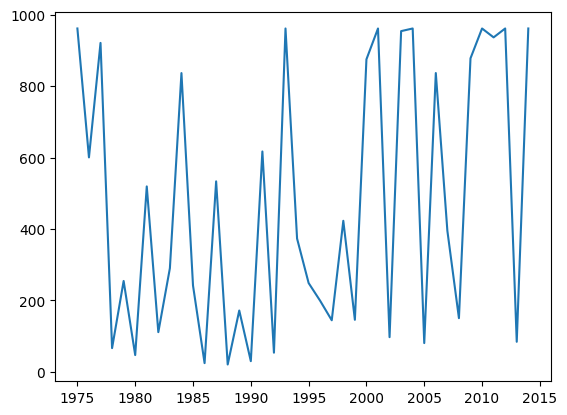

In [153]:
from matplotlib import pyplot as plt
plt.plot(AMS.index[24:],AMS_without_null['G9070142'])

# Time series plot of a non stationary time series from a gauging stations

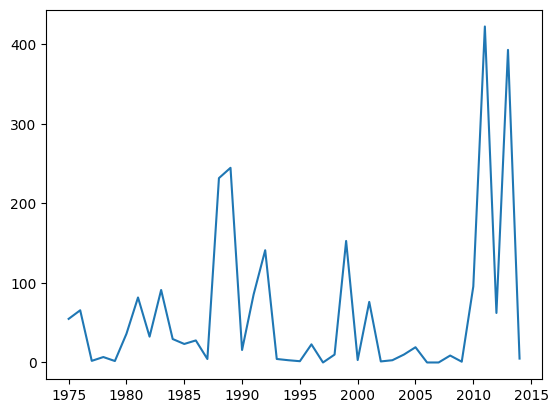

In [154]:
plt.plot(AMS.index[24:],AMS_without_null['138010A'])

# Time series plot of all non-stationary stations

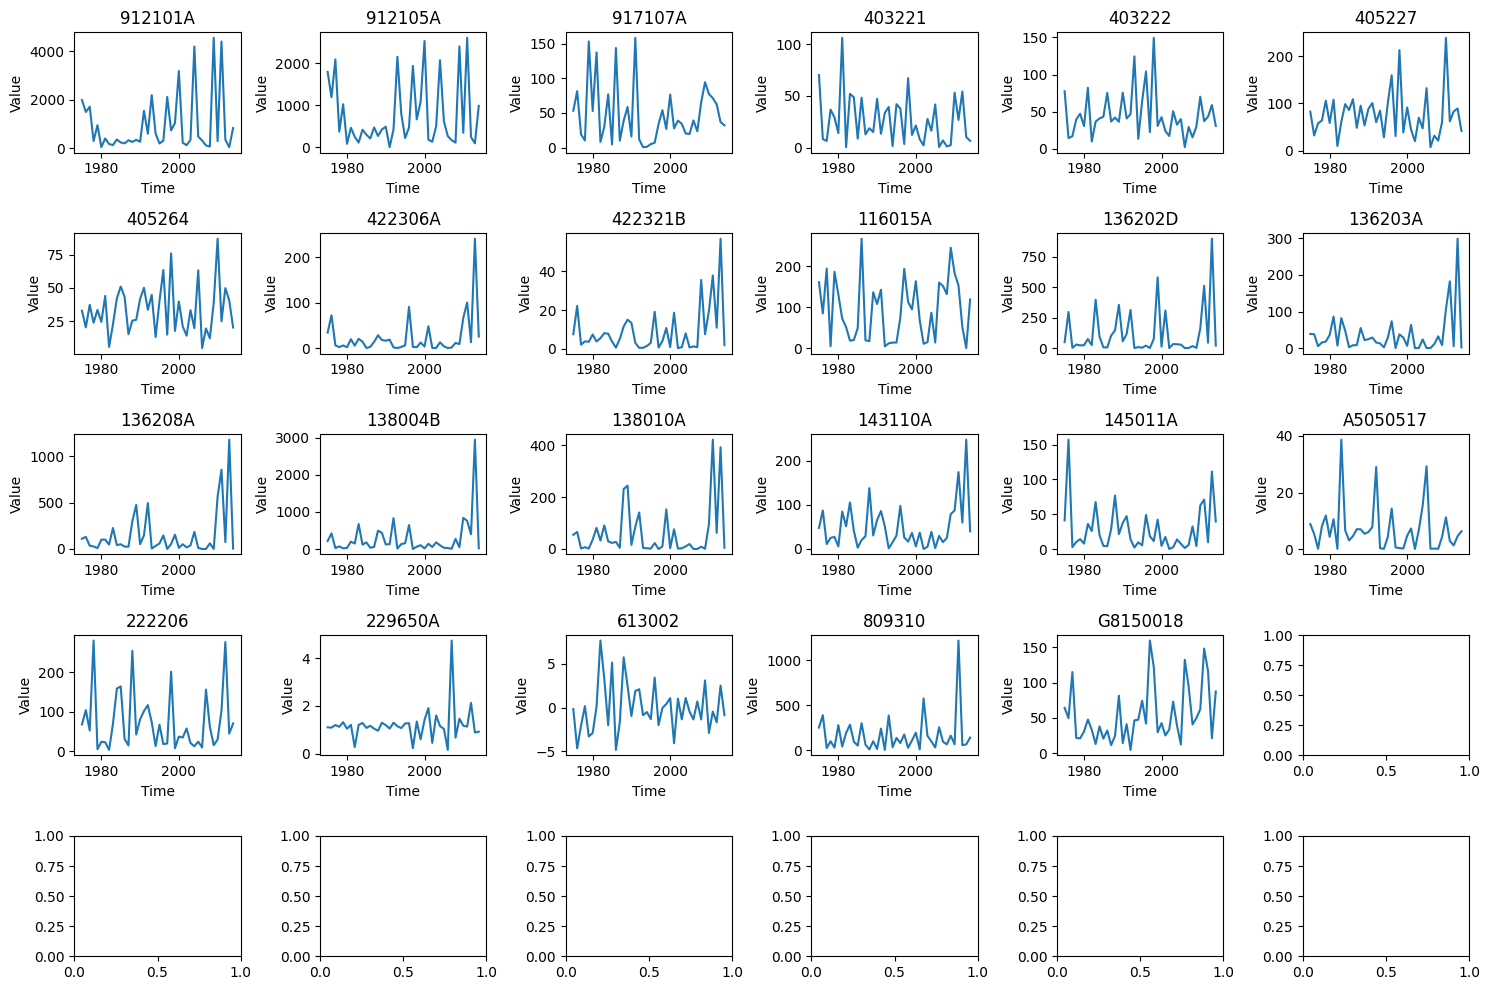

In [155]:
import matplotlib.pyplot as plt


num_rows = 5
num_cols = 6

# subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(non_stationary_stations):
    ax = axes[i]
    ax.plot(AMS_without_null.index, AMS_without_null[col])
    ax.set_title(col)
    ax.set_xlabel('Time')  # Adjust if your index represents something else
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


# Dropping off all the non-stationary stations

In [156]:
AMS_without_null.drop(columns = non_stationary_stations, inplace=True)

In [157]:
AMS_nonull_stationary = AMS_without_null
AMS_nonull_stationary.head()

,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,G9070142,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
1975,82.780489,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,20.463312,739.141103,961.993843,...,105.706499,10.947117,541.483803,702.487402,138.861322,45.200637,204.064666,88.438439,318.613702,69.022938
1976,63.181077,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,27.847303,4291.129944,600.857266,...,22.691637,5.454757,400.551835,567.257944,144.547779,27.681073,95.652281,72.701618,141.405345,27.574476
1977,34.213670,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,15.138561,2445.424164,921.572806,...,24.233873,4.964413,282.017871,336.861270,146.540949,15.218421,109.417702,62.479461,110.996628,42.028782
1978,5.595450,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,29.770990,611.380346,66.542630,...,16.011819,3.990414,441.044631,287.486586,136.151061,13.626996,107.551048,75.293037,90.595832,45.791142
1979,63.547278,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,10.329841,307.134608,254.626843,...,21.015838,1.491287,398.660643,381.880658,146.897457,17.976505,174.094951,98.649600,114.492670,36.450924


# Column names of all the stations with stationary time series

In [158]:
column_names_array_stationary = AMS_nonull_stationary.columns[:].tolist()

In [159]:
len(column_names_array_stationary)

196

In [160]:
for item in column_names_array_stationary:
  print(f"'{item}',")

'915011A',
'919003A',
'919201A',
'919309A',
'922101B',
'925001A',
'926002A',
'G9030124',
'G9030250',
'G9070142',
'A0020101',
'A0030501',
'G0010005',
'G0050115',
'G0060005',
'401009',
'401012',
'401015',
'401203',
'401208',
'401210',
'401212',
'401216',
'401217',
'402204',
'402206',
'402213',
'402217',
'403209A',
'403213A',
'403214',
'403217',
'403226',
'403232',
'404207',
'405205',
'405209',
'405215',
'405217',
'405218',
'405219',
'405226',
'405238',
'405245',
'405248',
'405251',
'405263',
'405274',
'406208',
'406213',
'406214',
'406224',
'407214',
'407215',
'407220',
'407230',
'407253',
'408200',
'408202',
'410057',
'410061',
'410705',
'410730',
'410731',
'410734',
'410761',
'412028',
'412050',
'412066',
'415207',
'415226',
'415237',
'416003',
'416008',
'418005',
'418014',
'419005',
'422202B',
'422313B',
'422319B',
'422334A',
'422394A',
'424002',
'424201A',
'102101A',
'104001A',
'105101A',
'105102A',
'105105A',
'107001B',
'108002A',
'108003A',
'112002A',
'112102A',
'113004A',
'116006B

In [161]:
AMS_nonull_stationary.shape

(40, 196)

# Saving the Annual max stationary and non zero streamflow time series for all the stations into a csv file

In [162]:
AMS_nonull_stationary.to_csv('streamflow_values.csv')

# Checking for Zero and negative values in the streamflow timeseries

In [114]:
# zero_values = (AMS_nonull_stationary == 0).any().any()
# negative_values = (AMS_nonull_stationary < 0).any().any()
# print(f"The data frame contains Zero values: {zero_values}")
# print(f"The data frame contains Negative values: {negative_values}")

# Counting and finding stations with zero and negative values in the timeseris



In [115]:
# count = 0
# col_with_negatives_zeros = []
# for index, row in AMS_nonull_stationary.iterrows():
#     for column, value in row.items():
#         if value <=0 :
#             count = count+1
#             col_with_negatives_zeros.append(column)
#             # print(f"Zero value found at position: ({index}, {column})")
# print(count)
# print(len(col_with_negatives_zeros))
# num_unique_stations = len(set(col_with_negatives_zeros))
# unique_stations = set(col_with_negatives_zeros)

# print("Number of unique strings:", num_unique_stations)
# print("Unique strings:", unique_stations)

### Observation: **There are 18 stations that contain zero values in the streamflow timeseries**

# Dropping the negative valued stations

In [116]:
# AMS_nonull_stationary.drop(columns = unique_stations, inplace=True)

In [117]:
# column_names_array_stationary = AMS_nonull_stationary.columns[:].tolist()

In [163]:
AMS_nonull_stationary.shape

(40, 196)

In [164]:
AMS_nonull_stationary.head()

,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,G9070142,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
1975,82.780489,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,20.463312,739.141103,961.993843,...,105.706499,10.947117,541.483803,702.487402,138.861322,45.200637,204.064666,88.438439,318.613702,69.022938
1976,63.181077,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,27.847303,4291.129944,600.857266,...,22.691637,5.454757,400.551835,567.257944,144.547779,27.681073,95.652281,72.701618,141.405345,27.574476
1977,34.213670,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,15.138561,2445.424164,921.572806,...,24.233873,4.964413,282.017871,336.861270,146.540949,15.218421,109.417702,62.479461,110.996628,42.028782
1978,5.595450,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,29.770990,611.380346,66.542630,...,16.011819,3.990414,441.044631,287.486586,136.151061,13.626996,107.551048,75.293037,90.595832,45.791142
1979,63.547278,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,10.329841,307.134608,254.626843,...,21.015838,1.491287,398.660643,381.880658,146.897457,17.976505,174.094951,98.649600,114.492670,36.450924


# Plotting the histograms for first 30 stationary timeseries streamflow stations

In [165]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-166-220702c60048>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AMS_nonull_stationary[col], ax=ax, hist=True, kde=True)
<ipython-input-166-220702c60048>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AMS_nonull_stationary[col], ax=ax, hist=True, kde=True)
<ipython-input-166-2

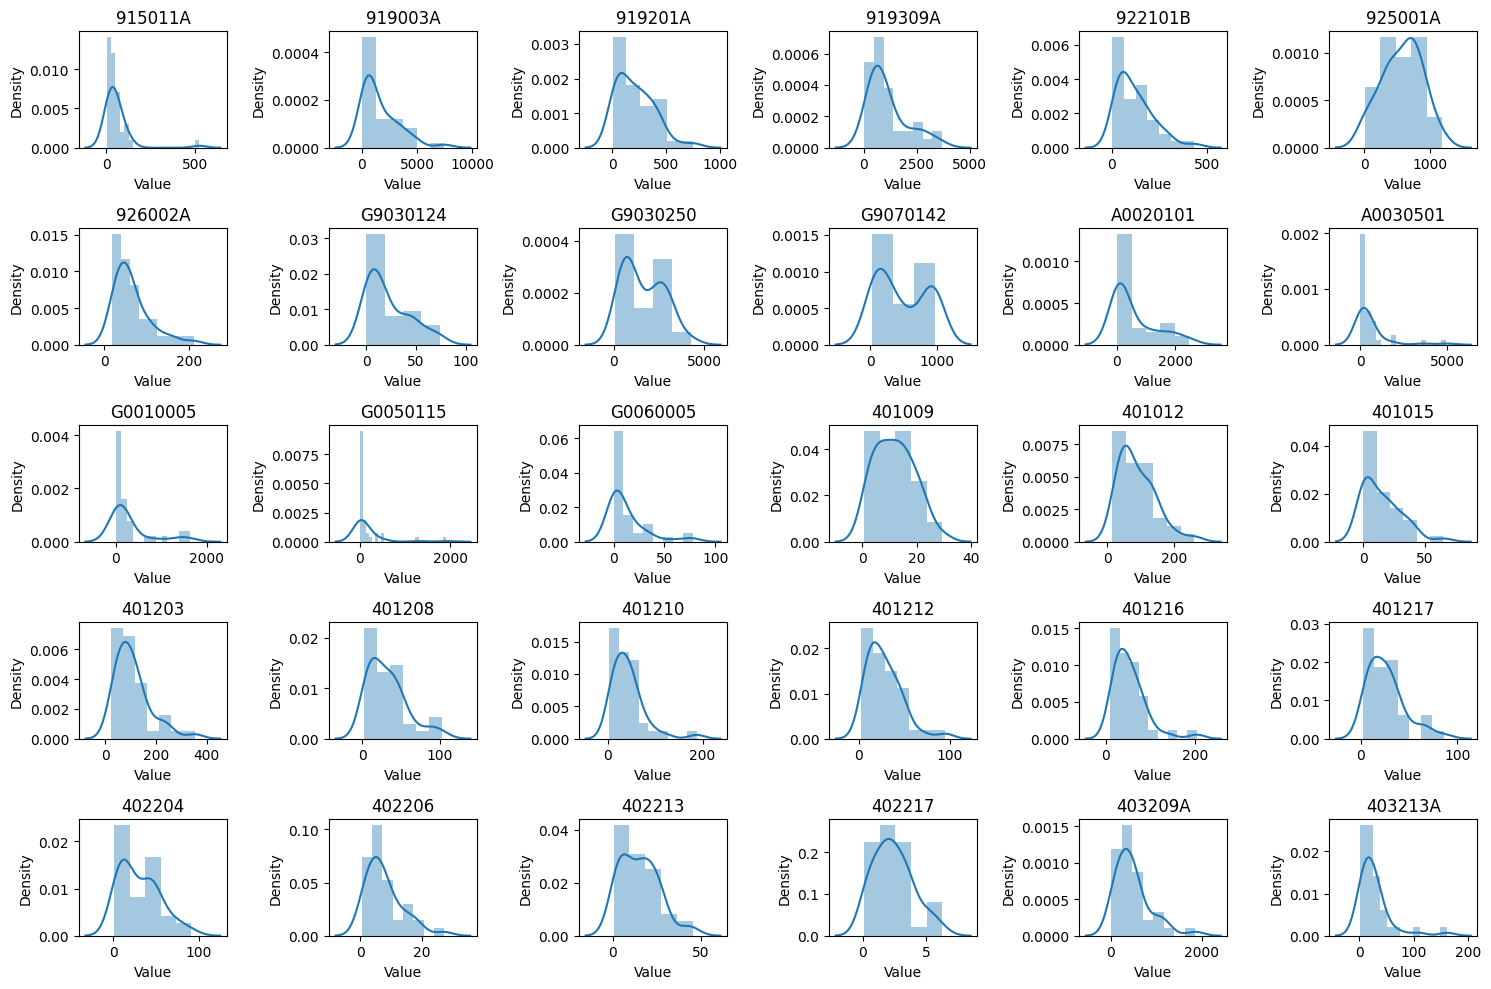

In [166]:
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(AMS_nonull_stationary.columns[:30]):
    ax = axes[i]
    sns.distplot(AMS_nonull_stationary[col], ax=ax, hist=True, kde=True)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')


for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [122]:
# !pip install lmoments3

In [167]:
import lmoments3

# **Quantile calculation for Gumbel Distribution**

In [168]:
import lmoments3 as lm
from lmoments3 import distr

# data = AMS_nonull_stationary['915011A']
# paras = distr.gum.lmom_fit(data)
# fitted_gum = distr.gum(**paras)
# median = fitted_gum.ppf(0.5)
# print(fitted_gum)
# paras

In [173]:
from scipy.stats import gumbel_l

results = []
AMS_nonull_stationary
for name in column_names_array_stationary:
    paras = distr.gum.lmom_fit(AMS_nonull_stationary[name])


    fitted_gum = distr.gum(**paras)
    # median = fitted_gam.ppf(0.5)
    # fitted_distribution = gumbel_l(loc, scale)
    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [fitted_gum.ppf(q) for q in quantiles]

    station_dict = {
        'Station': name,
        'Loc': paras['loc'],
        'Scale': paras['scale']
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_Quantiles_gumbel = pd.DataFrame(results)

In [174]:
All_Station_Quantiles_gumbel.head()

,Station,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,30.772317,42.798579,-27.607282,-16.185800,-4.923086,3.366806,10.405116,16.792835,46.458549
1,919003A,934.130994,1232.019960,-746.411540,-417.627385,-93.413626,145.223104,347.831181,531.711066,1385.682227
2,919201A,134.495141,140.447053,-57.082313,-19.601779,17.357742,44.561705,67.658496,88.620322,185.970801
3,919309A,699.981366,720.133247,-282.319725,-90.140695,99.366874,238.853448,357.280760,464.761176,963.919506
4,922101B,77.803991,75.813832,-25.610217,-5.378088,14.572796,29.257595,41.725326,53.040597,105.590740


# **Quantile calculation for LP3 Distribution**


In [175]:
from scipy.stats import gumbel_l

results = []

AMS_nonull_stationary
for name in column_names_array_stationary:
    paras = distr.pe3.lmom_fit(AMS_nonull_stationary[name])


    fitted_lp3 = distr.pe3(**paras)
    # median = fitted_gam.ppf(0.5)
    # fitted_distribution = gumbel_l(loc, scale)
    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [fitted_lp3.ppf(q) for q in quantiles]

    station_dict = {
        'Station': name,
        'Skew': paras['skew'],
        'Loc': paras['loc'],
        'Scale': paras['scale']
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_Quantiles_lp3 = pd.DataFrame(results)

In [176]:
All_Station_Quantiles_lp3.head()

,Station,Skew,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,3.019986,55.476327,67.665967,10.674591,10.747999,11.072008,11.696443,12.666368,14.025019,28.641920
1,919003A,2.241477,1645.272214,1757.392949,90.468030,119.473604,179.885386,251.521488,333.102599,424.474993,1057.460757
2,919201A,1.148534,215.563380,179.778274,-37.568919,-11.360367,18.332251,42.165058,63.459358,83.474337,181.904124
3,919309A,1.906977,1115.653557,987.985866,107.892986,146.112105,208.564638,272.028612,337.718797,406.439635,823.884051
4,922101B,1.607082,121.564923,100.844398,4.356016,11.570050,21.480187,30.497345,39.214730,47.896775,95.827728


In [185]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm, kstest

results = []
significant_count = 0
significance_level = 0.05

for name in column_names_array_stationary:
    data = AMS_nonull_stationary[name]

    paras = distr.pe3.lmom_fit(data)


    # fitted_lp3 = distr.pe3(**paras)
    # median = fitted_gam.ppf(0.5)
    # fitted_distribution = gumbel_l(loc, scale)
    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [fitted_lp3.ppf(q) for q in quantiles]

    # station_dict = {
    #     'Station': name,
    #     'Skew': paras['skew'],
    #     'Loc': paras['loc'],
    #     'Scale': paras['scale']
    # }

    # for i, quantile in enumerate(quantiles):
    #     station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    # results.append(station_dict)


    sigma = paras['scale']
    mu = paras['loc']       # Mean of log-data

    statistic, p_value = kstest(data, 'lognorm', args=(sigma, 0, np.exp(mu)))

    results.append({
        'Station': name,
        'Shape': paras['skew'],
        'Loc': paras['loc'],
        'Scale': paras['scale'],
        'KS Statistic': statistic,
        'P-value': p_value
    })

    if p_value > significance_level:
        significant_count += 1


results_df = pd.DataFrame(results)

print(f"Number of stations fitting the Log-Pearson Type III distribution within a significance level of {significance_level}: {significant_count}")
# print(results_df)


<ipython-input-185-e2c29b9cac88>:37: RuntimeWarning: overflow encountered in exp
  statistic, p_value = kstest(data, 'lognorm', args=(sigma, 0, np.exp(mu)))


Number of stations fitting the Log-Pearson Type III distribution within a significance level of 0.05: 0


# **Quantile calculation for gev Distribution**

In [177]:
from scipy.stats import gumbel_l

results = []
AMS_nonull_stationary
for name in column_names_array_stationary:
    paras = distr.gev.lmom_fit(AMS_nonull_stationary[name])


    fitted_gev = distr.gev(**paras)
    # median = fitted_gam.ppf(0.5)
    # fitted_distribution = gumbel_l(loc, scale)
    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [fitted_gev.ppf(q) for q in quantiles]

    station_dict = {
        'Station': name,
        'C': paras['c'],
        'Loc': paras['loc'],
        'Scale': paras['scale']
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_Quantiles_gev = pd.DataFrame(results)

In [178]:
All_Station_Quantiles_gev.head()

,Station,C,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,-0.447112,24.599826,22.703377,1.415345,4.912228,8.794214,11.957951,14.867691,17.700202,33.641524
1,919003A,-0.293473,799.185308,862.652711,-170.513252,-10.043680,160.992058,295.595762,416.039376,530.497104,1132.989167
2,919201A,-0.030435,132.579215,136.445204,-49.729046,-14.654946,20.211679,46.054178,68.114953,88.232331,182.868106
3,919309A,-0.217838,637.794952,563.037077,-26.623134,88.315780,208.392164,301.277394,383.274510,460.278111,852.616969
4,922101B,-0.146005,73.185314,64.978546,-7.180693,7.308952,22.160841,33.462954,43.312812,52.459239,97.649528


# **Quantile calculation for wakeby Distribution**

In [183]:
from scipy.stats import gumbel_l

AMS_nonull_stationary
for name in column_names_array_stationary:
    paras = distr.wak.lmom_fit(AMS_nonull_stationary[name])


    fitted_wak = distr.wak(**paras)
    # median = fitted_gam.ppf(0.5)
    # fitted_distribution = gumbel_l(loc, scale)
    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [fitted_wak.ppf(q) for q in quantiles]

    station_dict = {
        'Station': name,
        'Beta': paras['beta'],
        'Gamma': paras['gamma'],
        'Delta': paras['delta'],
        'Loc': paras['loc'],
        'Scale': paras['scale']
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_Quantiles_wak = pd.DataFrame(results)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/usr/local/lib/python3.10/dist-packages/lmoments3/distr.py:869: RuntimeWarning: invalid value encountered in divide
  v = np.where(d == 0, z, (1.0 - np.exp(d * z)) / d)


In [182]:
All_Station_Quantiles_wak.head()

,Station,Beta,Gamma,Delta,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,1.160958,7.591552,0.707510,-0.774352,65.467784,10.645775,28.446773,60.083720,94.521140,132.232200,173.806124,475.047442
1,919003A,0.000000,1492.209721,0.086714,11.381188,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,919201A,0.362379,0.000000,0.000000,-14.415380,313.318309,-8.108616,1.507308,17.973748,35.034351,52.747505,71.181437,177.632187
3,919309A,0.035328,0.000000,0.000000,99.702641,1051.842414,120.945123,153.606249,210.319305,270.157146,333.491777,400.766365,819.929975
4,922101B,0.156405,0.000000,0.000000,8.245513,131.043169,10.888762,14.940259,21.939151,29.274115,36.982561,45.108734,94.327277


### Log Pearson 3 Fitting and GOF test

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm, kstest

results = []
significant_count = 0
significance_level = 0.05

def fit_log_pearson3(data):
    log_data = np.log(data)
    shape = log_data.skew()
    scale = log_data.std()
    loc = log_data.mean() - (scale**2 / shape) if shape != 0 else log_data.mean()
    return shape, loc, scale

for name in column_names_array_stationary:
    data = AMS_nonull_stationary[name]
    shape, loc, scale = fit_log_pearson3(data)

    sigma = scale
    mu = loc       # Mean of log-data

    statistic, p_value = kstest(data, 'lognorm', args=(sigma, 0, np.exp(mu)))

    results.append({
        'Station': name,
        'Shape': shape,
        'Loc': loc,
        'Scale': scale,
        'KS Statistic': statistic,
        'P-value': p_value
    })

    if p_value > significance_level:
        significant_count += 1


results_df = pd.DataFrame(results)

print(f"Number of stations fitting the Log-Pearson Type III distribution within a significance level of {significance_level}: {significant_count}")
# print(results_df)


Number of stations fitting the Log-Pearson Type III distribution within a significance level of 0.05: 3


# **Quantile calculation for Gumbel Distribution**

In [ ]:
from scipy.stats import gumbel_l

results = []

for name in column_names_array_stationary:
    loc, scale = gumbel_l.fit(AMS_nonull_stationary[name])

    fitted_distribution = gumbel_l(loc, scale)
    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [fitted_distribution.ppf(q) for q in quantiles]

    station_dict = {
        'Station': name,
        'Loc': loc,
        'Scale': scale
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_Quantiles_gumbel = pd.DataFrame(results)


In [ ]:
All_Station_Quantiles_gumbel.head()

,Station,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,109.528129,157.432722,-504.764694,-358.077793,-244.753324,-176.520954,-126.611505,-86.617192,51.827003
1,919003A,2562.104462,2139.604847,-5786.502402,-3792.939689,-2252.792379,-1325.473661,-647.174404,-103.627770,1777.911641
2,919201A,308.430462,204.319351,-488.811113,-298.437904,-151.363130,-62.809789,1.963697,53.869120,233.544779
3,919309A,1624.383723,1093.849118,-2643.748439,-1624.561732,-837.178595,-363.097241,-16.324310,261.557846,1223.473888
4,922101B,174.049650,118.198330,-287.152984,-177.022469,-91.940010,-40.712082,-3.240752,26.786430,130.728435


### Saving the streamflow quantile values of **Gumble Distribution** to a csv file

In [ ]:
# All_Station_Quantiles_gumbel.to_csv('streamflow_quantiles.csv')

### Gumbel Distribution Fitting and GOF test

In [ ]:
import pandas as pd
from scipy.stats import gumbel_r, kstest


results = []
significant_count = 0
significance_level = 0.05

for name in column_names_array_stationary:
    data = AMS_nonull_stationary[name]
    loc, scale = gumbel_r.fit(data)

    statistic, p_value = kstest(data, 'gumbel_r', args=(loc, scale))


    results.append({
        'Station': name,
        'Loc': loc,
        'Scale': scale,
        'KS Statistic': statistic,
        'P-value': p_value
    })

    if p_value > significance_level:
        significant_count += 1

results_df = pd.DataFrame(results)

print(f"Number of stations fitting the Gumbel distribution within a significance level of {significance_level}: {significant_count}")
# print(results_df)


Number of stations fitting the Gumbel distribution within a significance level of 0.05: 160


# **Quantile calculation for GEV Distribution**

In [ ]:
from scipy.stats import genextreme

results = []

for name in column_names_array_stationary:
    shape, loc, scale = genextreme.fit(AMS_nonull_stationary[name])

    quantiles = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5]
    flood_values = [genextreme.ppf(q, shape, loc, scale) for q in quantiles]

    station_dict = {
        'Station': name,
        'Shape': shape,
        'Loc': loc,
        'Scale': scale
    }

    for i, quantile in enumerate(quantiles):
        station_dict[f'Q{int(quantile * 100)}'] = flood_values[i]

    results.append(station_dict)

All_Station_Quantiles_gev = pd.DataFrame(results)


In [ ]:
All_Station_Quantiles_gev.head()

,Station,Shape,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,-0.416131,25.357935,23.351684,1.052327,4.788546,8.902321,12.231436,15.276372,18.226138,34.603790
1,919003A,-6.071808,5.280006,8.470556,3.885296,3.886727,3.893759,3.913522,3.962515,4.076931,16.799249
2,919201A,-0.213025,122.537909,116.805338,-15.730531,8.255726,33.282169,52.620184,69.676682,85.682382,167.064186
3,919309A,-5.779993,15.368448,8.163140,13.956670,13.958626,13.967523,13.991016,14.046369,14.169938,25.703968
4,922101B,-0.307294,69.380459,56.730089,6.168513,16.543656,27.642524,36.404765,44.264634,51.750075,91.388886


### Saving the streamflow quantile values from **GEV Distritbuion** to a csv file

In [ ]:
All_Station_Quantiles_gev.to_csv('streamflow_quantiles_gev.csv')

### GEV fitting and GOF Test

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import genextreme, kstest


results = []
significant_count = 0
significance_level = 0.05

def fit_gev(data):
    # Remove zeros or negative values (if any)
    data = data[data > 0]
    shape, loc, scale = genextreme.fit(data)
    return shape, loc, scale

for name in column_names_array_stationary:
    data = AMS_nonull_stationary[name]
    shape, loc, scale = fit_gev(data)

    statistic, p_value = kstest(data, 'genextreme', args=(shape, loc, scale))

    results.append({
        'Station': name,
        'Shape': shape,
        'Loc': loc,
        'Scale': scale,
        'KS Statistic': statistic,
        'P-value': p_value
    })

    if p_value > significance_level:
        significant_count += 1

results_df = pd.DataFrame(results)

print(f"Number of stations fitting the Generalized Extreme Value Distribution within a significance level of {significance_level}: {significant_count}")
# print(results_df)


Number of stations fitting the Generalized Extreme Value Distribution within a significance level of 0.05: 156


### Plotting the inverse quantile function for some stations using the parameters obtained from fitting the GEV distribution to the streamflow timeseries

In [ ]:
stations = {
    # 'Station1': {'shape': -0.416131	, 'loc': 25.357935, 'scale': 23.351684},
    'Station2': {'shape': -6.071808	, 'loc': 5.280006, 'scale': 8.470556},
    # 'Station3': {'shape': -0.213025	, 'loc': 122.537909, 'scale': 116.805338}
}

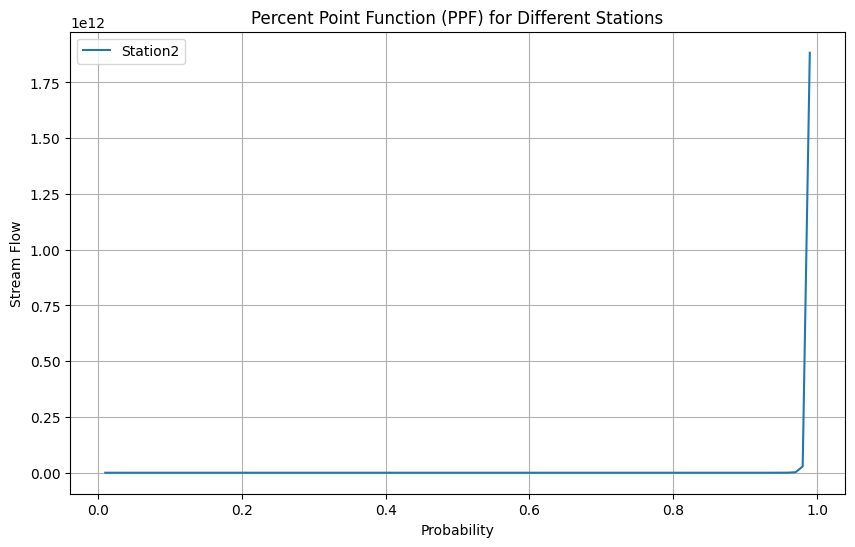

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme
probabilities = np.linspace(0.01, 0.99, 100)  # Avoid exactly 0 or 1 to prevent infinities or undefined values
plt.figure(figsize=(10, 6))

for name, params in stations.items():

    ppf_values = genextreme.ppf(probabilities, params['shape'], loc=params['loc'], scale=params['scale'])

    # PPF curve
    plt.plot(probabilities, ppf_values, label=name)

plt.title('Percent Point Function (PPF) for Different Stations')
plt.xlabel('Probability')
plt.ylabel('Stream Flow')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
All_Station_Quantiles_gev.shape

(177, 11)

### Removing all the stations that have any negative quantile values obtained from GEV Distribution

In [ ]:
quantile_columns =  ['Q2', 'Q5', 'Q10', 'Q15', 'Q20', 'Q25', 'Q50']
All_Station_Quantiles_gev = All_Station_Quantiles_gev[~All_Station_Quantiles_gev[quantile_columns].apply(lambda x: (x < 0).any(), axis=1)]
All_Station_Quantiles_gev.head()

,Station,Shape,Loc,Scale,Q2,Q5,Q10,Q15,Q20,Q25,Q50
0,915011A,-0.416131,25.357935,23.351684,1.052327,4.788546,8.902321,12.231436,15.276372,18.226138,34.603790
1,919003A,-6.071808,5.280006,8.470556,3.885296,3.886727,3.893759,3.913522,3.962515,4.076931,16.799249
3,919309A,-5.779993,15.368448,8.163140,13.956670,13.958626,13.967523,13.991016,14.046369,14.169938,25.703968
4,922101B,-0.307294,69.380459,56.730089,6.168513,16.543656,27.642524,36.404765,44.264634,51.750075,91.388886
6,926002A,-0.313555,42.450923,23.192617,16.710750,20.919850,25.430034,28.995774,32.197882,35.250442,51.459020


In [ ]:
All_Station_Quantiles_gev.shape

(136, 11)

# Column names of stationary, non-zero, non-negative quantiles stations

In [ ]:
tempcols = All_Station_Quantiles_gev['Station']
for col in tempcols:
  print(f"'{col}',")

'915011A',
'919003A',
'919309A',
'922101B',
'926002A',
'G9030250',
'G9070142',
'A0020101',
'A0030501',
'401012',
'401203',
'401208',
'401210',
'401212',
'401216',
'401217',
'402206',
'403209A',
'403213A',
'403214',
'403217',
'403232',
'405205',
'405209',
'405215',
'405218',
'405219',
'405251',
'405263',
'407214',
'407253',
'410057',
'410061',
'410705',
'410730',
'410731',
'410761',
'412028',
'412066',
'415207',
'416003',
'416008',
'418014',
'419005',
'422313B',
'422334A',
'422394A',
'424002',
'424201A',
'102101A',
'104001A',
'105101A',
'105102A',
'107001B',
'108002A',
'108003A',
'112002A',
'112102A',
'113004A',
'116006B',
'116010A',
'116011A',
'121001A',
'137101A',
'137201A',
'138009A',
'143009A',
'143303A',
'145018A',
'146010A',
'146014A',
'146095A',
'A5030502',
'A5040517',
'A5130501',
'204034',
'206014',
'206018',
'208007',
'208009',
'210006',
'210011',
'212209',
'212260',
'215004',
'215207',
'216002',
'218001',
'219001',
'221207',
'222213',
'223202',
'224206',
'224213A',
'224214A',


# Column names of stationary, non-zero timeseries

In [ ]:
column_names_array_stationary

['915011A',
 '919003A',
 '919201A',
 '919309A',
 '922101B',
 '925001A',
 '926002A',
 'G9030124',
 'G9030250',
 'G9070142',
 'A0020101',
 'A0030501',
 '401009',
 '401012',
 '401203',
 '401208',
 '401210',
 '401212',
 '401216',
 '401217',
 '402204',
 '402206',
 '402213',
 '402217',
 '403209A',
 '403213A',
 '403214',
 '403217',
 '403226',
 '403232',
 '404207',
 '405205',
 '405209',
 '405215',
 '405217',
 '405218',
 '405219',
 '405226',
 '405238',
 '405245',
 '405251',
 '405263',
 '405274',
 '406208',
 '406213',
 '406214',
 '407214',
 '407215',
 '407253',
 '408202',
 '410057',
 '410061',
 '410705',
 '410730',
 '410731',
 '410761',
 '412028',
 '412050',
 '412066',
 '415207',
 '416003',
 '416008',
 '418005',
 '418014',
 '419005',
 '422202B',
 '422313B',
 '422334A',
 '422394A',
 '424002',
 '424201A',
 '102101A',
 '104001A',
 '105101A',
 '105102A',
 '105105A',
 '107001B',
 '108002A',
 '108003A',
 '112002A',
 '112102A',
 '113004A',
 '116006B',
 '116010A',
 '116011A',
 '116012A',
 '116013A',
 '1